Lab 5 - Spatial Analysis in Python, Part 2
============
Justin Bologna
---------

Introduction and Setup
------
Today we will be looking at some basic spatial operatoins in a Python Jupyer notebook. First, let's import the libraries we will be using. 

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Dissolving spatial boundaries
=========
One important spatial operation is dissolving boundaries between polygons. We might want to do this in a wide variety of situations. In our example, we will aggregate census tracts in Riverside County, CA into two areas: wet and dry. 
First, let's import the data. 

In [4]:
tracts_df = gpd.read_file('data/clinics.shp')

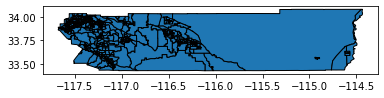

In [5]:
tracts_df.plot(edgecolor='k')

This simple plot shows the county broken up into census tracts, but if we were, say, geologists or hydroligists, we might be less interested in census designation than about land features. Let's dissolve these boundaries to show "dry" and "wet" areas. For the purpose of this exercise, we define a dry place as having less that 0.5% of its area covered by water. 
We must first add a variable to the dataframe describing if a given tract is dry or wet.  

In [6]:
tracts_df.loc[tracts_df['AWATER10']/(tracts_df['AWATER10']+tracts_df['ALAND10']) <= 0.005, 'dry'] = 'True' 
tracts_df.loc[tracts_df['AWATER10']/(tracts_df['AWATER10']+tracts_df['ALAND10']) > 0.005, 'dry'] = 'False' 

In [7]:
tracts_df.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinics,geometry,dry
0,06065042012,Census Tract 420.12,2687173.0,0.0,+33.9108776,-117.3205065,6242,420,545,620,...,826,3927,2299,3.44,2.78,0.095958,0.000262,0.0,"POLYGON ((-117.30046 33.91311, -117.30068 33.9...",True
1,06065041911,Census Tract 419.11,70257842.0,0.0,+33.7428832,-117.4957943,10258,840,844,806,...,430,8710,1543,3.02,3.59,0.466106,0.006836,0.0,"POLYGON ((-117.51020 33.80027, -117.50851 33.8...",True
2,06065041910,Census Tract 419.10,11167489.0,64225.0,+33.7892199,-117.4949771,6342,404,453,447,...,350,5177,1165,2.84,3.33,0.200974,0.001093,0.0,"POLYGON ((-117.50298 33.82495, -117.50291 33.8...",False
3,06065040816,Census Tract 408.16,1788821.0,0.0,+33.9024569,-117.5246107,2594,162,161,227,...,171,2133,451,3.10,2.64,0.082444,0.000174,0.0,"POLYGON ((-117.51512 33.90097, -117.51532 33.9...",True
4,06065040815,Census Tract 408.15,1266779.0,0.0,+33.8930776,-117.5114997,3586,231,235,257,...,399,2462,1124,3.26,2.82,0.050637,0.000123,0.0,"POLYGON ((-117.50386 33.89736, -117.50357 33.8...",True


Great. We can see that of the first five tracts, the one with 'AWATER10' greater than 0 is the only one marked false for dry. Now let's dissolve the boundaries along our new variable. 

In [8]:
dry_tracts = tracts_df.dissolve(by='dry')

In [9]:
dry_tracts.head()

,geometry,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinics
dry,,,,,,,,,,,,,,,,,,,,,
False,"MULTIPOLYGON (((-114.51650 33.72782, -114.5164...",06065041910,Census Tract 419.10,11167489.0,64225.0,+33.7892199,-117.4949771,6342,404,453,...,2173,1823,350,5177,1165,2.84,3.33,0.200974,0.001093,0.0
True,"MULTIPOLYGON (((-117.08902 33.43029, -117.0890...",06065042012,Census Tract 420.12,2687173.0,0.0,+33.9108776,-117.3205065,6242,420,545,...,1968,1142,826,3927,2299,3.44,2.78,0.095958,0.000262,0.0


And now, let's plot it to see what the pattern looks like.

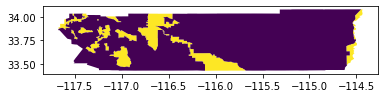

In [17]:
dry_tracts.plot(column='AWATER10', edgecolor='none')

Cartograpgy in GeoPandas
====
Out plot above shows the data, but it is not exactly the prettiest. We can use the relatively simple library, PyPlot to make attractive maps.
Let's make a map of the homocide rate in 1990 (HR90) in Texas.
First we iomport the libraries and data we need.

In [2]:
from pysal.viz import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/srv/conda/envs/notebook/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


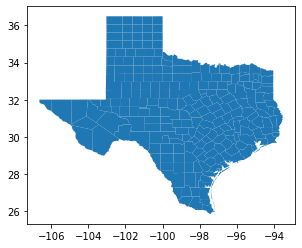

In [3]:
shp_link = "data/texas.shp"
tx = gpd.read_file(shp_link)
tx.plot()

Good, that basic plot shows that we're on the right track. 

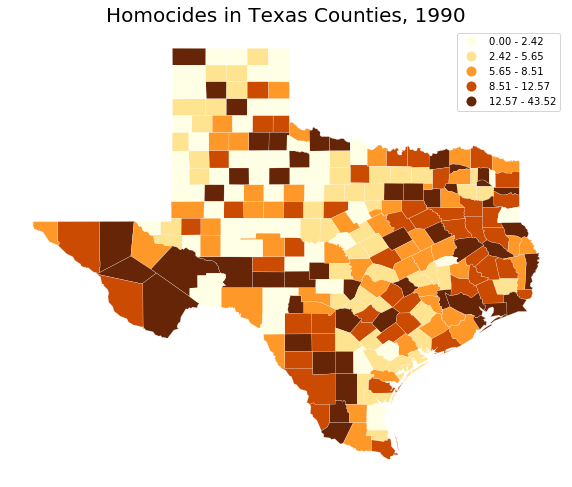

In [13]:
import matplotlib.pyplot as plt 

f, ax = plt.subplots(1, figsize=(10, 10)) # Set the axes to print a larger map
tx.plot(column='HR90', # Select HR90 as the variable to plot
        scheme='QUANTILES', #Set the bins to quantiles
        k=5, # Five bins (quintiles)
        cmap='YlOrBr', # Set the color Palette
        linewidth=0.2, # Set county dividing line width
        ax=ax, # Use previously defines axes
        edgecolor='white', # Set county border color
        legend=True # Add a legend
       )
plt.title(label='Homocides in Texas Counties, 1990', 
         fontdict={'fontsize':20}
) # Add a title to the plot
ax.set_axis_off() #Remove unsightly axes
plt.show()